In [1]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from manual_library.text_processing import tokenize_text,lemmatisasi_text
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
sns.set()


In [2]:
dataku = pd.read_csv('DataGanjarCapresClean.csv')
dataku.head()

,full_text,text_clean,class
0,"Soal pertemuan Ganjar dan Airlangga, tertutup....",soal temu ganjar airlangga tutup temu tidak pe...,2
1,"Meski sepi dari pemberitaan, sebetulnya Ganjar...",meski sepi berita ganjar airlangga hartarto te...,0
2,@Gus_Raharjo @ganjarpranowo Kok hebat kali dia...,hebat kali udel ganti ganjar sekali coblos yoh...,2
3,"@FadlyNajib @geloraco Bisa jadi, ganjar wapres",jadi ganjar wapres,0
4,1 Muharam bersama GANJAR https,muharam sama ganjar,1


In [3]:
dataku['tokens'] = dataku['text_clean'].apply(lambda x: tokenize_text(x))
dataku.head() 

,full_text,text_clean,class,tokens
0,"Soal pertemuan Ganjar dan Airlangga, tertutup....",soal temu ganjar airlangga tutup temu tidak pe...,2,"[soal, temu, ganjar, airlangga, tutup, temu, t..."
1,"Meski sepi dari pemberitaan, sebetulnya Ganjar...",meski sepi berita ganjar airlangga hartarto te...,0,"[meski, sepi, berita, ganjar, airlangga, harta..."
2,@Gus_Raharjo @ganjarpranowo Kok hebat kali dia...,hebat kali udel ganti ganjar sekali coblos yoh...,2,"[hebat, kali, udel, ganti, ganjar, sekali, cob..."
3,"@FadlyNajib @geloraco Bisa jadi, ganjar wapres",jadi ganjar wapres,0,"[jadi, ganjar, wapres]"
4,1 Muharam bersama GANJAR https,muharam sama ganjar,1,"[muharam, sama, ganjar]"


In [4]:
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()

dataku['lemma'] = dataku['tokens'].apply(lambda x: lemmatisasi_text(x,stopwords))
dataku.head()

,full_text,text_clean,class,tokens,lemma
0,"Soal pertemuan Ganjar dan Airlangga, tertutup....",soal temu ganjar airlangga tutup temu tidak pe...,2,"[soal, temu, ganjar, airlangga, tutup, temu, t...",temu ganjar airlangga tutup temu magnet ganjar...
1,"Meski sepi dari pemberitaan, sebetulnya Ganjar...",meski sepi berita ganjar airlangga hartarto te...,0,"[meski, sepi, berita, ganjar, airlangga, harta...",sepi berita ganjar airlangga hartarto temu pub...
2,@Gus_Raharjo @ganjarpranowo Kok hebat kali dia...,hebat kali udel ganti ganjar sekali coblos yoh...,2,"[hebat, kali, udel, ganti, ganjar, sekali, cob...",hebat udel ganti ganjar coblos yohanis yamani ...
3,"@FadlyNajib @geloraco Bisa jadi, ganjar wapres",jadi ganjar wapres,0,"[jadi, ganjar, wapres]",ganjar wapres
4,1 Muharam bersama GANJAR https,muharam sama ganjar,1,"[muharam, sama, ganjar]",muharam ganjar


In [5]:
dataku

,full_text,text_clean,class,tokens,lemma
0,"Soal pertemuan Ganjar dan Airlangga, tertutup....",soal temu ganjar airlangga tutup temu tidak pe...,2,"[soal, temu, ganjar, airlangga, tutup, temu, t...",temu ganjar airlangga tutup temu magnet ganjar...
1,"Meski sepi dari pemberitaan, sebetulnya Ganjar...",meski sepi berita ganjar airlangga hartarto te...,0,"[meski, sepi, berita, ganjar, airlangga, harta...",sepi berita ganjar airlangga hartarto temu pub...
2,@Gus_Raharjo @ganjarpranowo Kok hebat kali dia...,hebat kali udel ganti ganjar sekali coblos yoh...,2,"[hebat, kali, udel, ganti, ganjar, sekali, cob...",hebat udel ganti ganjar coblos yohanis yamani ...
3,"@FadlyNajib @geloraco Bisa jadi, ganjar wapres",jadi ganjar wapres,0,"[jadi, ganjar, wapres]",ganjar wapres
4,1 Muharam bersama GANJAR https,muharam sama ganjar,1,"[muharam, sama, ganjar]",muharam ganjar
...,...,...,...,...,...
1017,@ganjarpranowo Dijateng banyak persoalan kok c...,dijateng banyak soal cawe ngurusi tryout njar ...,2,"[dijateng, banyak, soal, cawe, ngurusi, tryout...",dijateng cawe ngurusi tryout njar ganjar
1018,@tvOneNews Yg penting jangan dukung ganjar dah...,penting jangan dukung ganjar jangan pokok,2,"[penting, jangan, dukung, ganjar, jangan, pokok]",dukung ganjar pokok
1019,@aan_muba @ganjarpranowo Kasihan murid yg dita...,kasihan murid tanya ganjar beban moril rasa di...,0,"[kasihan, murid, tanya, ganjar, beban, moril, ...",kasihan murid ganjar beban moril kepalasekolah...
1020,@ganjarpranowo @ESDMJateng Lalu setelah tau be...,lalu tahu izin bagaimana lanjut proses lalu be...,2,"[lalu, tahu, izin, bagaimana, lanjut, proses, ...",izin lanjut proses izin kasih izin tryout teta...


In [6]:
dataku=dataku.dropna(axis='rows')


In [7]:
dataku.to_csv("lemma.csv",index=False)#
dataku.head()

,full_text,text_clean,class,tokens,lemma
0,"Soal pertemuan Ganjar dan Airlangga, tertutup....",soal temu ganjar airlangga tutup temu tidak pe...,2,"[soal, temu, ganjar, airlangga, tutup, temu, t...",temu ganjar airlangga tutup temu magnet ganjar...
1,"Meski sepi dari pemberitaan, sebetulnya Ganjar...",meski sepi berita ganjar airlangga hartarto te...,0,"[meski, sepi, berita, ganjar, airlangga, harta...",sepi berita ganjar airlangga hartarto temu pub...
2,@Gus_Raharjo @ganjarpranowo Kok hebat kali dia...,hebat kali udel ganti ganjar sekali coblos yoh...,2,"[hebat, kali, udel, ganti, ganjar, sekali, cob...",hebat udel ganti ganjar coblos yohanis yamani ...
3,"@FadlyNajib @geloraco Bisa jadi, ganjar wapres",jadi ganjar wapres,0,"[jadi, ganjar, wapres]",ganjar wapres
4,1 Muharam bersama GANJAR https,muharam sama ganjar,1,"[muharam, sama, ganjar]",muharam ganjar


In [15]:
data_negatif = dataku[dataku["label"]==2]
data_positif = dataku[dataku["label"]==1]
data_netral = dataku[dataku["label"]==0]

negatif_list = data_negatif["lemma"].tolist()
positif_list = data_positif["lemma"].tolist()
netral_list = data_netral["lemma"].tolist()

filtered_negatif = ("").join(str(negatif_list))
filtered_negatif = filtered_negatif.lower()

filtered_positif = ("").join(str(positif_list))
filtered_positif = filtered_positif.lower()

filtered_netral = ("").join(str(netral_list))
filtered_netral = filtered_netral.lower()


In [16]:
filtered_positif

"['muharam ganjar', 'ganjar pranowo', 'komando jokowi komando ganjar tetap data fakta sebar cinta penjuru negeri jokowi ajar rawan', 'ganjar calon', 'mantan panglima andika perkasa cawapres ganjar buka suara', 'lari ganjar judul budiman prabowo sakit hati akut nebar isubohong', 'ganjar pilih kayak nasib kayak pakdhe jokowi nenek kunci kamar mandi nyalahin ganjar', 'hina klaim manusia bahagia bahagia manusia baik urus negara serah ahli ganjar pranowo baik bukti data fakta', 'ganjar pranowo politik uang politik identitas tarik simpati masyarakat elektabilitas ganjar tinggi masyarakat indonesia gubernur jateng dingin bal tidur bus', 'ganjar jokowi asli indonesia prabowo jokowi asli indonesia anies asli arab fakta bgitu maaf putra putri pribumi nusantara pimpin rakyat indonesia hancur yaman', 'siaga curang erick thohir terima masyarakat cawapres ganjar pranowo detail', 'bpjs sorot jokowi puja ganjar dukung suara sungsang bwakakak', 'dukung ganjar pranowo', 'ganjar pranowo presiden mulus ja

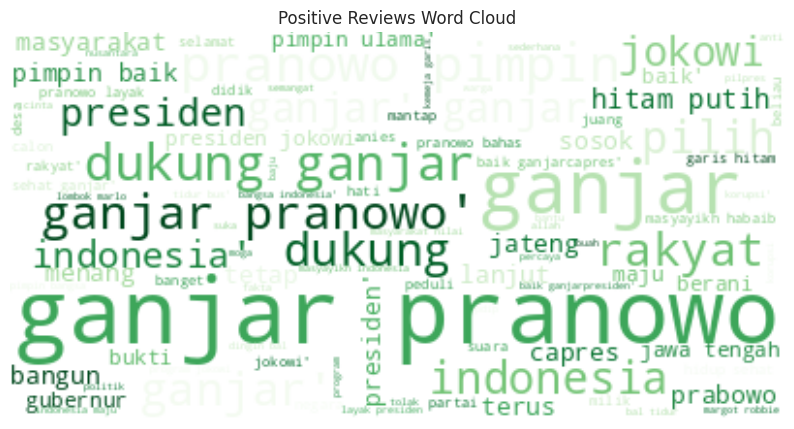

In [18]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positif)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

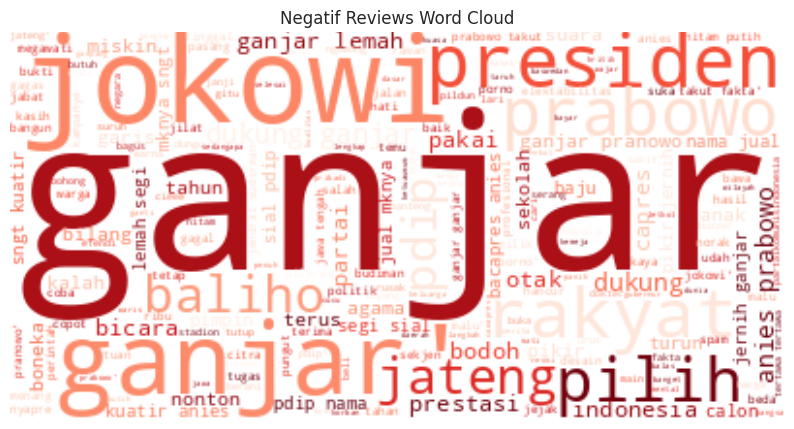

In [19]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negatif)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negatif Reviews Word Cloud")
plt.show()

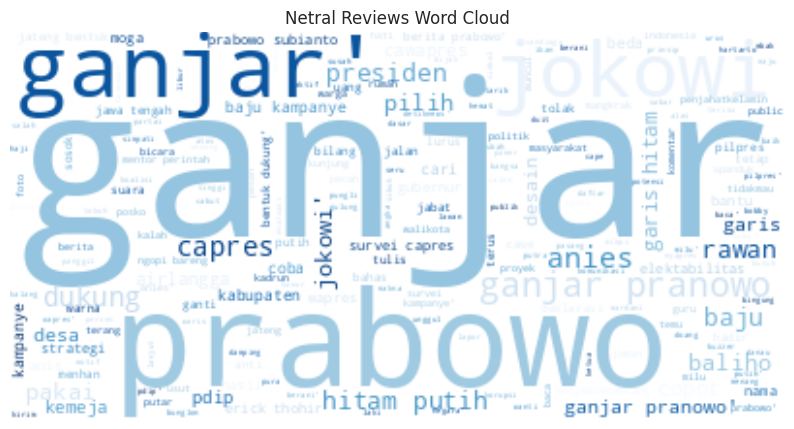

In [20]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Blues").generate(filtered_netral)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Netral Reviews Word Cloud")
plt.show()

In [15]:
print("kalah" in stopwords)

False


array([-10.,   1., -12., -16.])

4